In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import PROST
PROST.__version__

' 1.1.2 '

In [2]:
# the location of R (used for the mclust clustering)
ENVpath = "your path of PROST_ENV"            # refer to 'How to use PROST' section  
os.environ['R_HOME'] = f'{ENVpath}/lib/R'
os.environ['R_USER'] = f'{ENVpath}/lib/python3.7/site-packages/rpy2'

# init
SEED = 818
PROST.setup_seed(SEED)

# Set directory (If you want to use additional data, please change the file path)
rootdir = 'datasets/SeqFISH/'

input_dir = os.path.join(rootdir)
output_dir = os.path.join(rootdir,'results/')
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

In [3]:
# Read counts and metadata
counts = pd.read_csv(input_dir + "counts.txt", sep = "\t")
metadata = pd.read_csv(input_dir + "metadata.txt", sep = "\t")
gene_name = counts.index

In [4]:
# Create anndata for embryo1 (embryo2 or embryo3)
'''Embryo1'''
metadata_embryo1 = metadata[metadata["embryo"]=="embryo1"]
counts_embryo1 = counts.loc[:,metadata_embryo1["uniqueID"]]
spatial_embryo1 = metadata_embryo1[["x_global","y_global"]]
spatial_embryo1.index = metadata_embryo1["uniqueID"]

# Create anndata
adata = sc.AnnData(counts_embryo1.T)
adata.var_names_make_unique()
# read spatial
adata.obsm["spatial"] = spatial_embryo1.to_numpy()
# read annotation
annotation = metadata_embryo1["celltype_mapped_refined"]
annotation.index = metadata_embryo1["uniqueID"]
adata.obs["annotation"] = annotation
adata.write_h5ad(output_dir+"/used_data1.h5")

'''Embryo2'''
# metadata_embryo2 = metadata[metadata["embryo"]=="embryo2"]
# counts_embryo2 = counts.loc[:,metadata_embryo2["uniqueID"]]
# spatial_embryo2 = metadata_embryo2[["x_global","y_global"]]
# spatial_embryo2.index = metadata_embryo2["uniqueID"]

# # Create anndata
# adata = sc.AnnData(counts_embryo2.T)
# adata.var_names_make_unique()
# # read spatial
# adata.obsm["spatial"] = spatial_embryo2.to_numpy()
# # read annotation
# annotation = metadata_embryo2["celltype_mapped_refined"]
# annotation.index = metadata_embryo2["uniqueID"]
# adata.obs["annotation"] = annotation
# adata.write_h5ad(output_dir+"/used_data2.h5")

'''Embryo3'''
# metadata_embryo3 = metadata[metadata["embryo"]=="embryo3"]
# counts_embryo3 = counts.loc[:,metadata_embryo3["uniqueID"]]
# spatial_embryo3 = metadata_embryo3[["x_global","y_global"]]
# spatial_embryo3.index = metadata_embryo3["uniqueID"]

# # Create anndata
# adata = sc.AnnData(counts_embryo3.T)
# adata.var_names_make_unique()
# # read spatial
# adata.obsm["spatial"] = spatial_embryo3.to_numpy()
# # read annotation
# annotation = metadata_embryo3["celltype_mapped_refined"]
# annotation.index = metadata_embryo3["uniqueID"]
# adata.obs["annotation"] = annotation
# adata.write_h5ad(output_dir+"/used_data3.h5")

... storing 'annotation' as categorical


'Embryo3'


Filtering genes ...


Trying to set attribute `.var` of view, copying.



Normalization to each gene:


100%|██████████| 351/351 [00:00<00:00, 5237.45it/s]



Gaussian filtering for each gene:


100%|██████████| 351/351 [00:40<00:00,  8.67it/s]



Binary segmentation for each gene:


100%|██████████| 351/351 [00:00<00:00, 18470.16it/s]



Spliting subregions for each gene:


100%|██████████| 351/351 [00:00<00:00, 8355.38it/s]



Computing PROST Index for each gene:


100%|██████████| 351/351 [00:39<00:00,  8.99it/s]



PROST Index calculation completed !!

Drawing pictures:


100%|██████████| 1/1 [00:15<00:00, 15.74s/it]



Drawing completed !!


100%|██████████| 50/50 [20:36<00:00, 24.73s/it]


Average Moran'I of SVGs detected by PI = 0.34560184671132244 
Median Moran'I of SVGs detected by PI = 0.36483518066319803 
Average Geary'C of SVGs detected by PI = 0.6171409870242501 
Median Geary'C of SVGs detected by PI = 0.5998499527724659


,geneID,PI,Moran_I,Geary_C
0,Hoxb9,1.000000,0.488931,0.465319
1,Cdx2,0.566876,0.411493,0.548865
2,Hoxc8,0.558326,0.302270,0.661814
3,Wnt5a,0.554483,0.429061,0.535140
4,Bambi,0.483233,0.424679,0.537970
5,Hoxa9,0.479378,0.348462,0.628304
6,Hoxb4,0.465979,0.291391,0.673090
7,Hoxb3,0.453696,0.275454,0.681236
8,Tmem119,0.449840,0.420086,0.532817
9,Fgfr2,0.440052,0.296640,0.670719


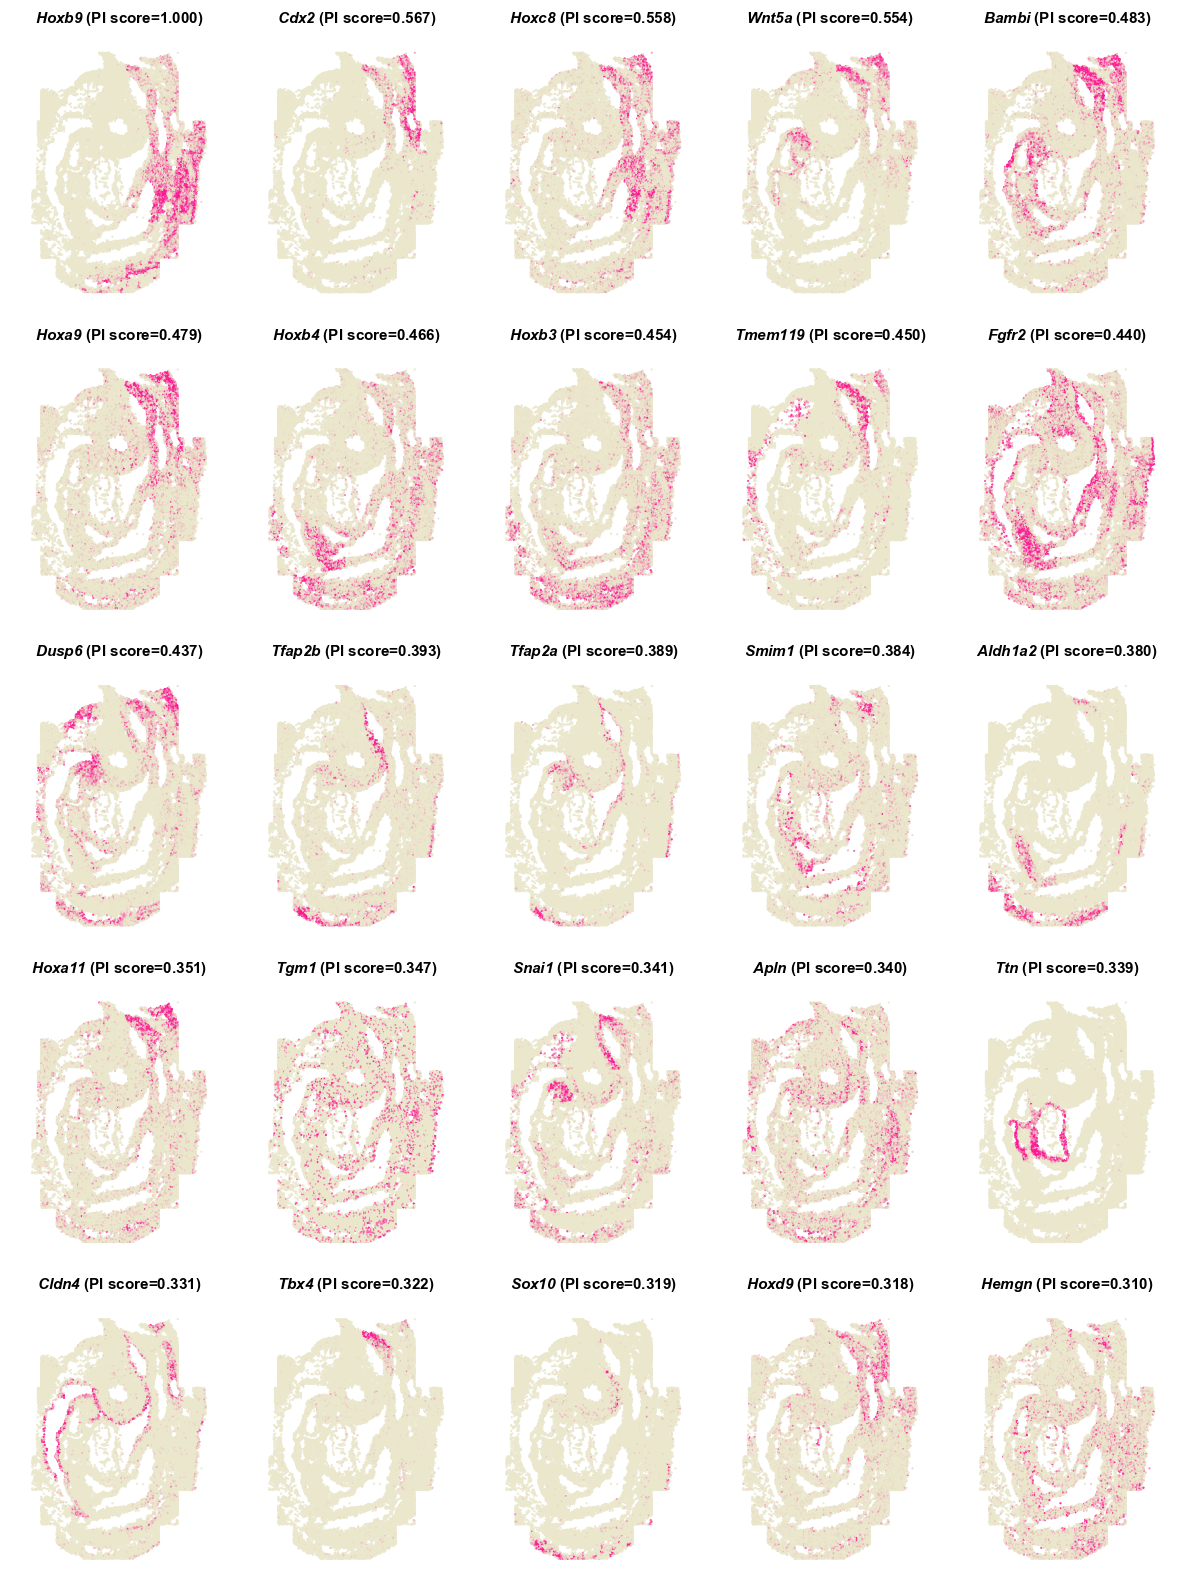

In [5]:
# Calculate PI
adata = sc.read(output_dir+"/used_data1.h5")
adata = PROST.prepare_for_PI(adata, percentage = 0.01, platform="SeqFISH")
adata = PROST.cal_prost_index(adata, connect_kernel_size=8, neighbors=8, platform="SeqFISH",del_rate=0.05)

# Calculate spatial autocorrelation statistics and Hypothesis test
'''
PROST.spatial_autocorrelation(adata, k = 10, permutations = None)
'''

adata.write_h5ad(output_dir+"/PI_result.h5")

# Draw SVGs detected by PI
PROST.plot_gene(adata, platform="SeqFISH", size = 0.3, top_n = 25, ncols_each_sheet = 5, nrows_each_sheet = 5,save_path = output_dir)

In [6]:
#%% Clustering
# Set the number of clusters
n_clusters = 24

PROST.setup_seed(SEED)
# Read PI result
adata = sc.read(output_dir+"/PI_result.h5")

# 1.Expression data preprocessing
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)


# 3.Run PROST
PROST.run_prost_clust(adata, 
                        platform="SeqFISH", 
                        min_distance = 3,
                        init="mclust",
                        n_clusters = n_clusters,                      
                        tol = 5e-3,
                        laplacin_filter = True,
                        lr = 0.1, 
                        SEED=SEED,
                        max_epochs = 500,
                        post_processing = False,
                        cuda = False)

# save result
adata.write_h5ad(output_dir + "/PNN_result.h5")
clustering = adata.obs["clustering"]
clustering.to_csv(output_dir + "/clusters.csv",header = False)
embedding = adata.obsm["PROST"]
np.savetxt(output_dir + "/embedding.txt",embedding)


Calculating adjacency matrix ...

Running PCA ...
Laplacian Smoothing ...

Initializing cluster centers with mclust, n_clusters known


Epoch: : 501it [3:17:42, 23.68s/it, loss=0.28359604]                         


Clustering completed !!


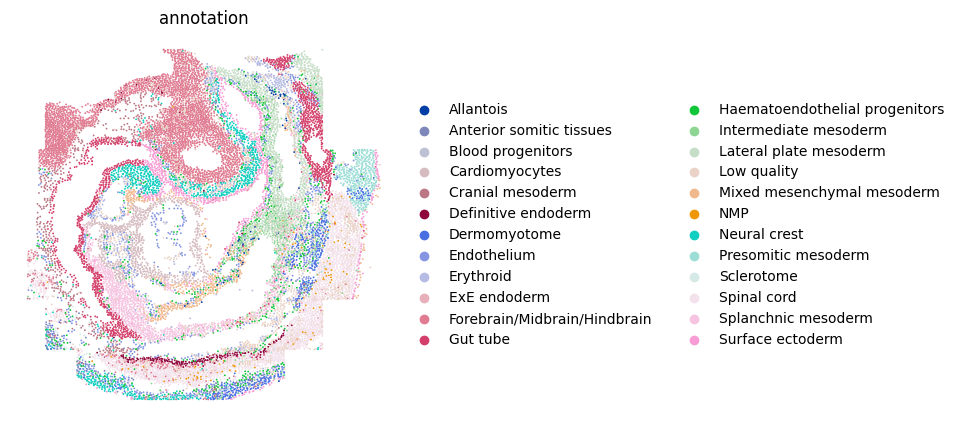

In [7]:
# plot annotation
plt.rcParams["figure.figsize"] = (5,5)
ax = sc.pl.embedding(adata, basis="spatial", color="annotation",size = 7,s=6, show=False, title='annotation')
ax.invert_yaxis()
plt.axis('off')
plt.savefig(output_dir+"/annotation.png", dpi=600, bbox_inches='tight')

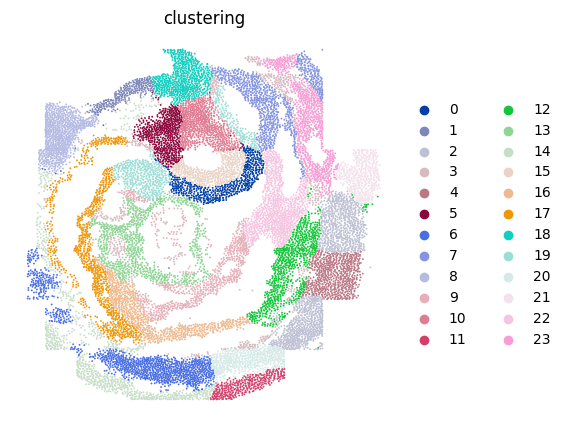

In [8]:
# Plot clustering result
plt.rcParams["figure.figsize"] = (5,5)
ax = sc.pl.embedding(adata, basis="spatial", color="clustering",size = 7,s=6, show=False, title='clustering')
ax.invert_yaxis()
plt.axis('off')
plt.savefig(output_dir+"/clustering.png", dpi=600, bbox_inches='tight')

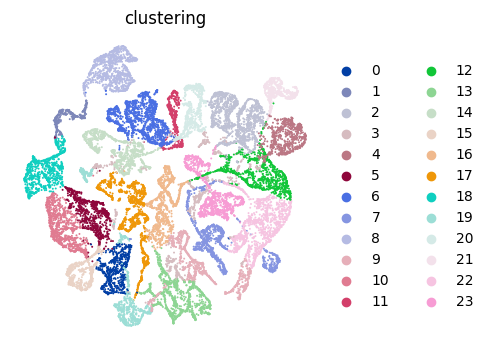

In [9]:
# Plot UMAP
plt.rcParams["figure.figsize"] = (4,4)
sc.pp.neighbors(adata, use_rep="PROST")
sc.tl.umap(adata)
ax = sc.pl.umap(adata, color="clustering", frameon=False, size=8,show = False)
plt.axis('off')
plt.subplots_adjust()
plt.savefig(output_dir+"/umap.png", dpi=600,bbox_inches='tight')
